In [62]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import random

In [63]:
dataset_path = '../all_image'

In [ ]:
image_data = []
class_counts = {}


for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path): 
        count = 0
       
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                
                img = cv2.imread(image_path)
                if img is not None:
                    height, width, _ = img.shape 
                    aspect_ratio = width / height
                    image_data.append({
                        'class': class_name,
                        'path': image_path,
                        'height': height,
                        'width': width,
                        'aspect_ratio': aspect_ratio
                    })
                    count += 1
                else:
                    print(f"Não foi possível ler a imagem: {image_path}")

               

            except Exception as e:
                print(f"Erro ao processar a imagem {image_path}: {e}")
        class_counts[class_name] = count


df_images = pd.DataFrame(image_data)

# Análise da distribuição das classes

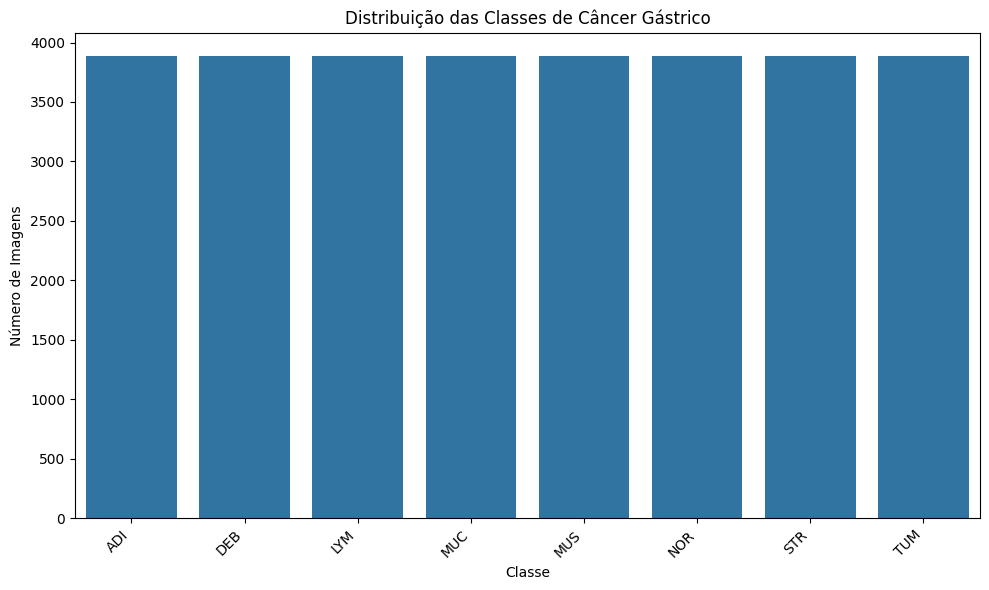

In [ ]:

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Distribuição das Classes das Imagens')
    plt.xlabel('Classe')
    plt.ylabel('Número de Imagens')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


O dataset está balanceado. Os autores não fizeram aumento/redução artificial nos exemplos.

# Análise da dimensão das imagens

In [77]:
df_images['height'].describe()

count    31096.0
mean       224.0
std          0.0
min        224.0
25%        224.0
50%        224.0
75%        224.0
max        224.0
Name: height, dtype: float64

In [76]:
df_images['width'].describe()

count    31096.0
mean       224.0
std          0.0
min        224.0
25%        224.0
50%        224.0
75%        224.0
max        224.0
Name: width, dtype: float64

As imagens possuem dimensão 224x224.

# Visualização dos exemplos

In [ ]:

supported_image_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp', '.gif')

image_data_list = []


if not os.path.exists(dataset_path):
    print(f"O caminho do dataset '{dataset_path}' não foi encontrado")
    df = pd.DataFrame() 
 
    for class_label in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_label)
        
        
        if os.path.isdir(class_path):
           
            for image_filename in os.listdir(class_path):
           
                if image_filename.lower().endswith(supported_image_extensions):
                    file_path = os.path.join(class_path, image_filename)
                    
                    
                    image_data_list.append({
                        'file_path': file_path,
                        'label': class_label  
                    })
    
   
    df = pd.DataFrame(image_data_list)



--- Classe: ADI ---


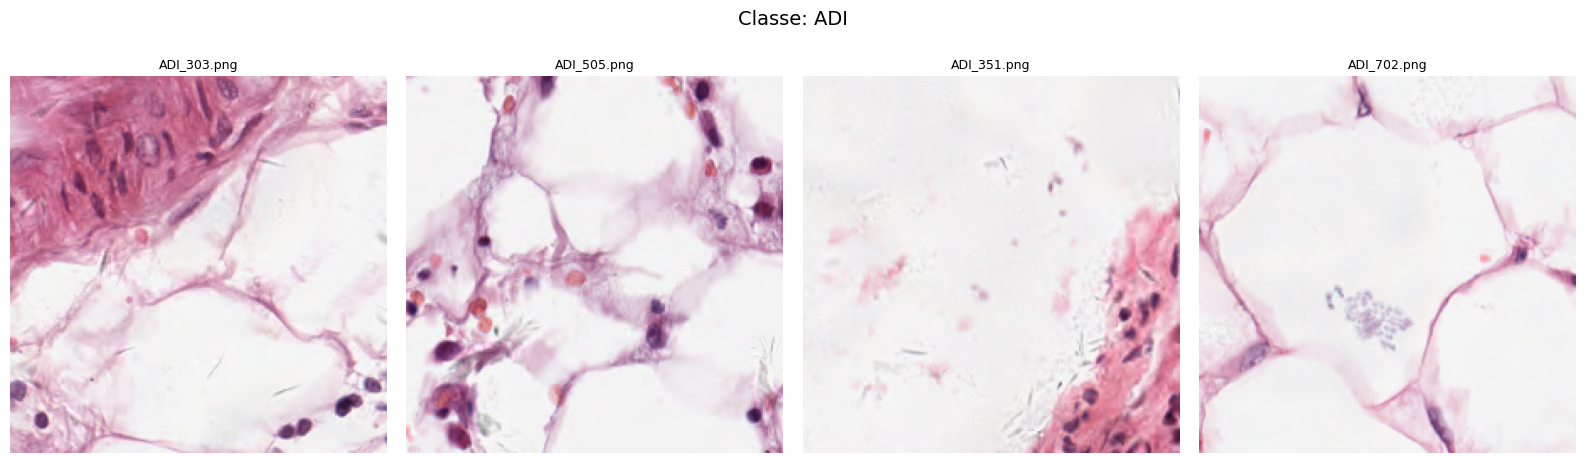


--- Classe: DEB ---


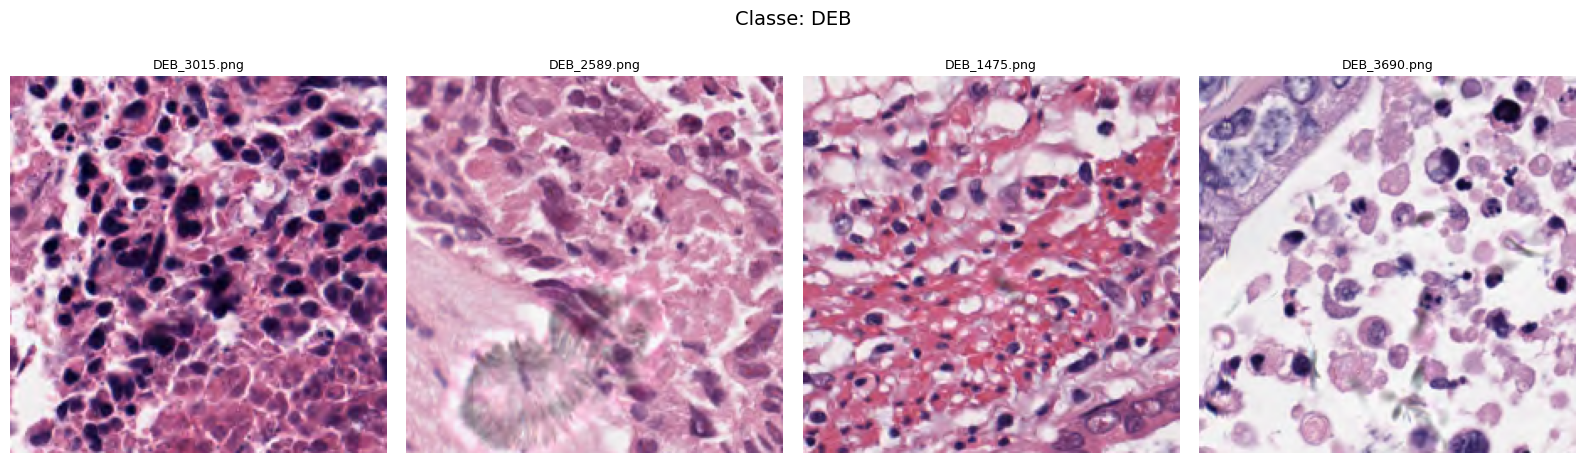


--- Classe: LYM ---


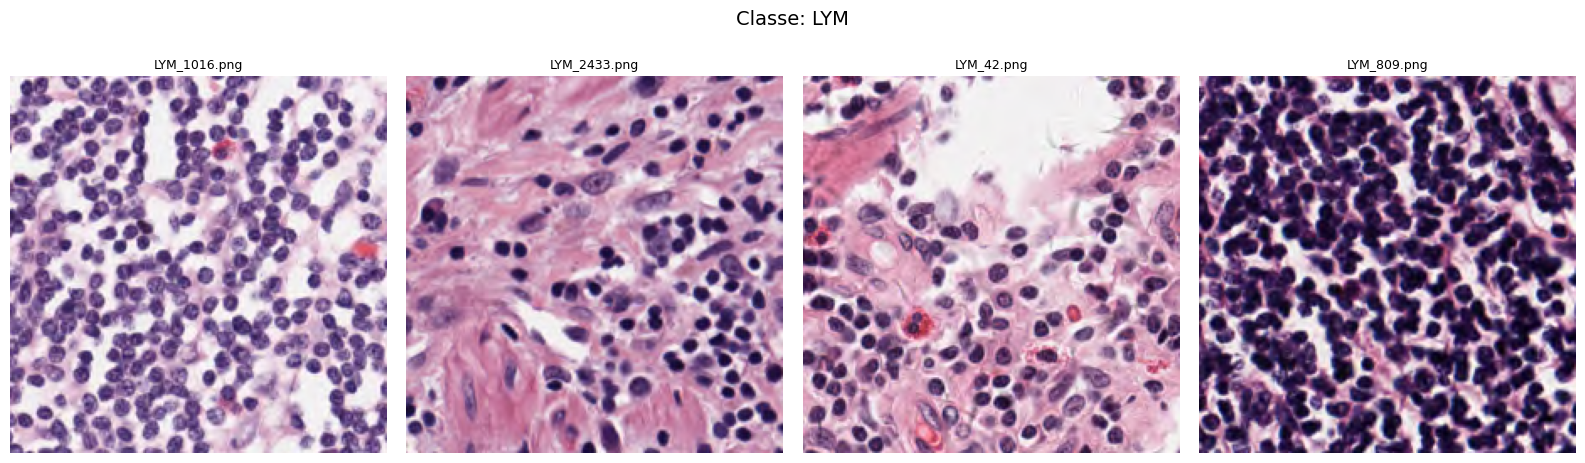


--- Classe: MUC ---


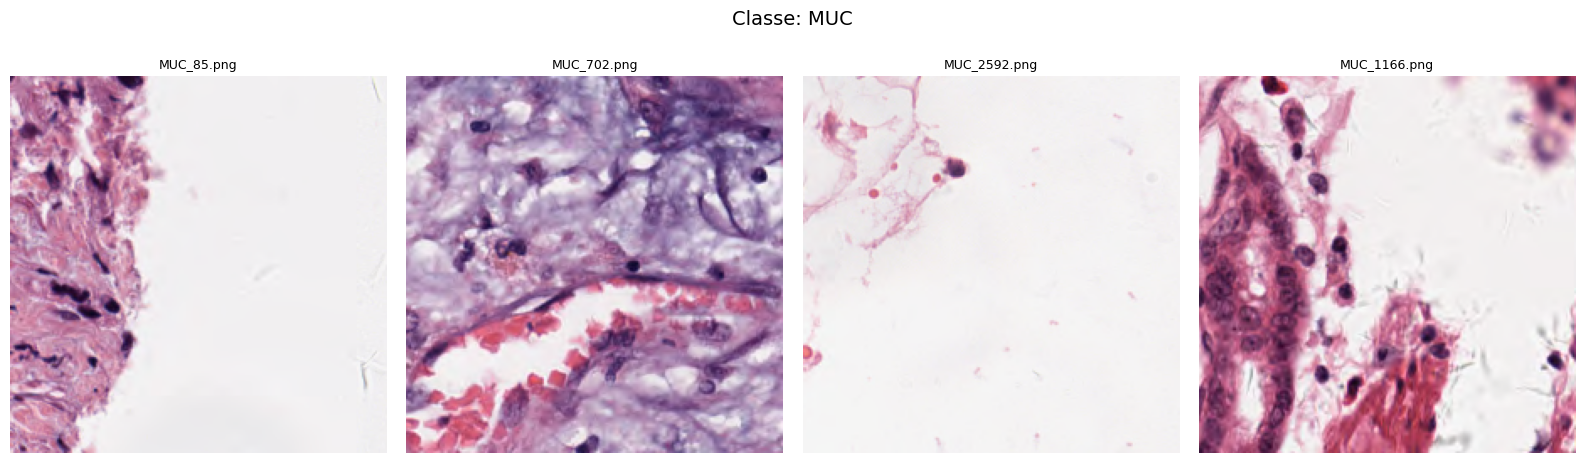


--- Classe: MUS ---


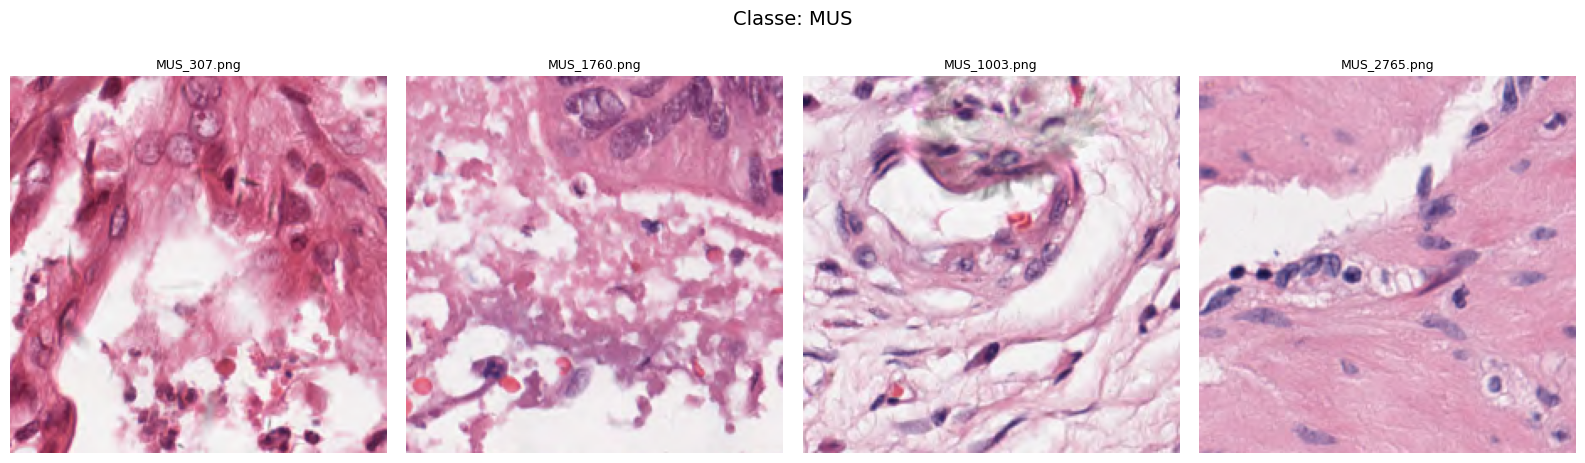


--- Classe: NOR ---


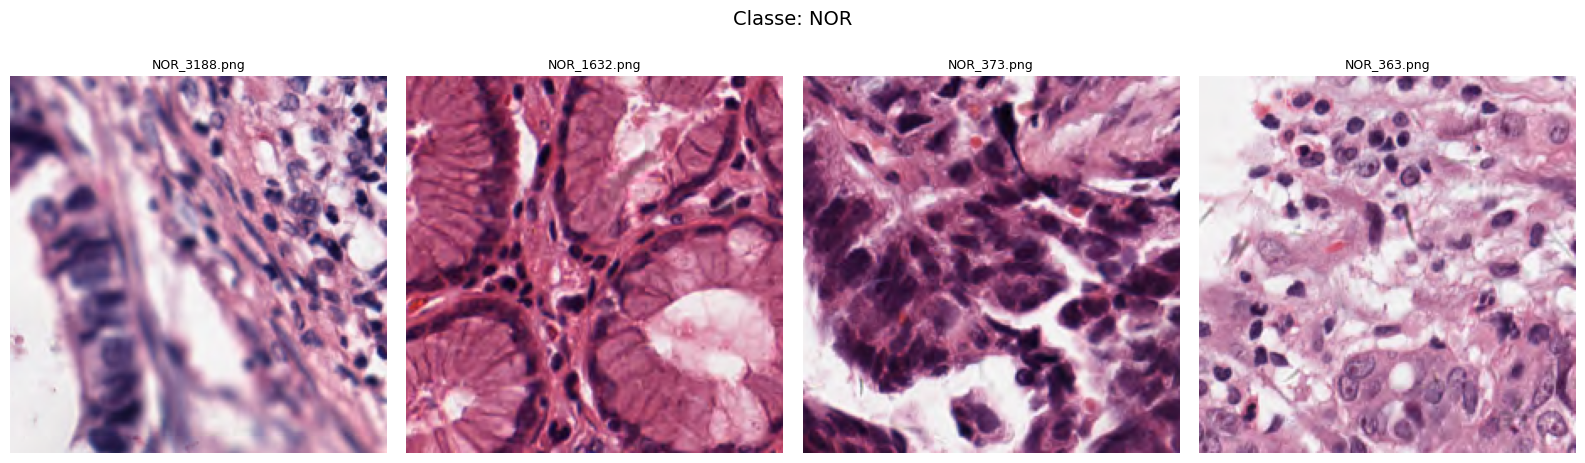


--- Classe: STR ---


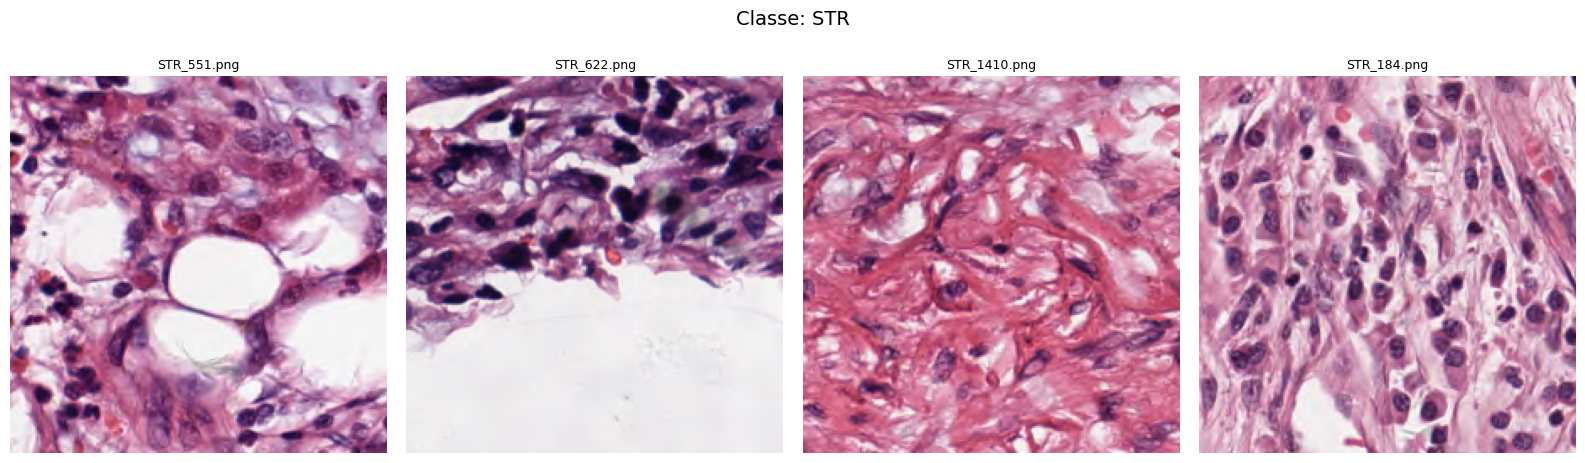


--- Classe: TUM ---


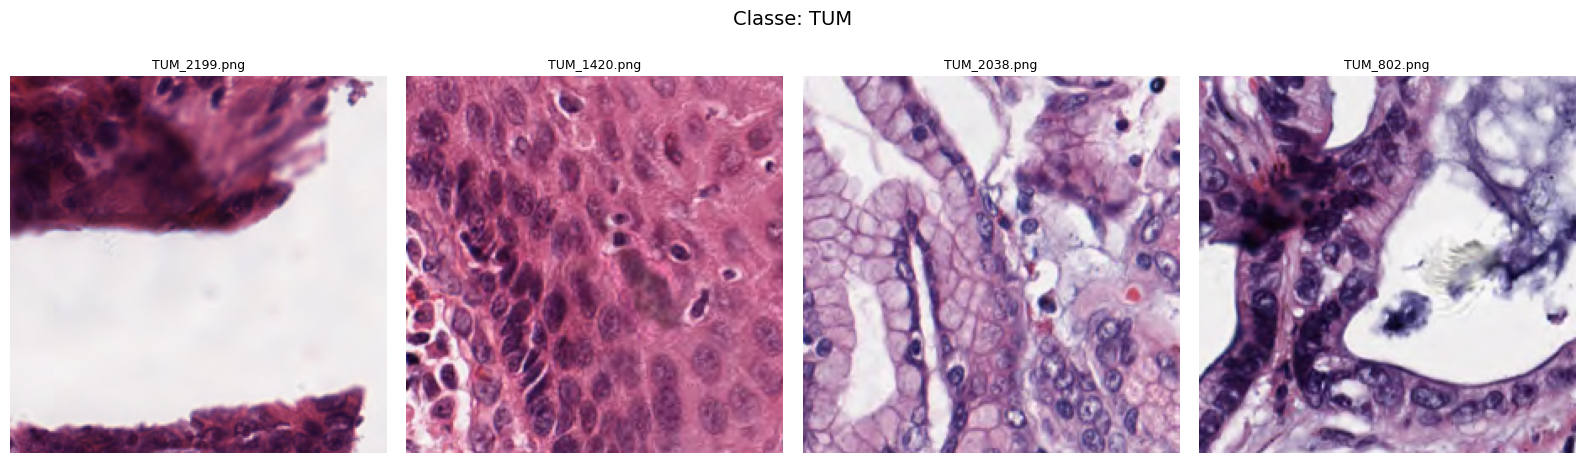

In [67]:

    unique_labels = df['label'].unique()
    num_images_to_show_per_class = 4

   
    for current_label in unique_labels:
        print(f"\n--- Classe: {current_label} ---")
        
        
        class_df = df[df['label'] == current_label]
        
       
        num_to_sample = min(num_images_to_show_per_class, len(class_df))
        
        if num_to_sample == 0:
            print(f"Nenhuma imagem encontrada para a classe '{current_label}' no DF.")
            continue 
            

        sampled_images_df = class_df.sample(n=num_to_sample, random_state=None)
        
       
        if num_to_sample <= 2:
            plot_rows = 1
            plot_cols = num_to_sample
        else: 
            plot_rows = 1
            plot_cols = 4 
            
        plt.figure(figsize=(plot_cols * 4, plot_rows * 4.5)) 
        plt.suptitle(f"Classe: {current_label}", fontsize=14, y=1.02) 
        
        for i, (index, row_data) in enumerate(sampled_images_df.iterrows()):
            file_path = row_data['file_path']
            
            try:
                image = Image.open(file_path)
                
                plt.subplot(plot_rows, plot_cols, i + 1)
                
                
                if image.mode == 'L':
                    plt.imshow(image, cmap='gray')
                else:
                    plt.imshow(image)
                    
                plt.title(os.path.basename(file_path), fontsize=9) 
                plt.axis('off') 
                
            except FileNotFoundError:
                print(f"  ERRO: Arquivo não encontrado - {file_path}")
                plt.subplot(plot_rows, plot_cols, i + 1)
                plt.text(0.5, 0.5, f"Arquivo não\nencontrado:\n{os.path.basename(file_path)}",
                         horizontalalignment='center', verticalalignment='center', fontsize=8, color='red')
                plt.axis('off')
            except Exception as e:
                print(f"  ERRO ao carregar/processar imagem {file_path}: {e}")
                plt.subplot(plot_rows, plot_cols, i + 1)
                plt.text(0.5, 0.5, f"Erro ao carregar:\n{os.path.basename(file_path)}",
                         horizontalalignment='center', verticalalignment='center', fontsize=8, color='red')
                plt.axis('off')
                
        plt.tight_layout(rect=[0, 0, 1, 0.98]) 
        plt.show()


# Análise dos canais de cor (RGB)

In [ ]:
stats_per_class_df = df.groupby('label').agg(
    
    Mean_Intensity_R=('img_mean_R', 'mean'),
    Std_Intensity_R=('img_mean_R', 'std'), 

    
    Mean_Intensity_G=('img_mean_G', 'mean'),
    Std_Intensity_G=('img_mean_G', 'std'), 

    
    Mean_Intensity_B=('img_mean_B', 'mean'),
    Std_Intensity_B=('img_mean_B', 'std')  
).reset_index()


stats_per_class_df.rename(columns={'label': 'Classe'}, inplace=True)


stats_per_class_df['Canal R (Média ± DP)'] = stats_per_class_df.apply(
    lambda row: f"{row['Mean_Intensity_R']:.2f} ± {row['Std_Intensity_R']:.2f}", axis=1
)
stats_per_class_df['Canal G (Média ± DP)'] = stats_per_class_df.apply(
    lambda row: f"{row['Mean_Intensity_G']:.2f} ± {row['Std_Intensity_G']:.2f}", axis=1
)
stats_per_class_df['Canal B (Média ± DP)'] = stats_per_class_df.apply(
    lambda row: f"{row['Mean_Intensity_B']:.2f} ± {row['Std_Intensity_B']:.2f}", axis=1
)


display_df_per_class = stats_per_class_df[['Classe', 'Canal R (Média ± DP)', 'Canal G (Média ± DP)', 'Canal B (Média ± DP)']]


styled_display_per_class = display_df_per_class.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center'), ('min-width', '120px')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Tabela 1: Intensidade Média ± Desvio Padrão por Classe e Canal")

display(styled_display_per_class)


overall_mean_R = df['img_mean_R'].mean()
overall_std_R = df['img_mean_R'].std() 

overall_mean_G = df['img_mean_G'].mean()
overall_std_G = df['img_mean_G'].std() 

overall_mean_B = df['img_mean_B'].mean()
overall_std_B = df['img_mean_B'].std() 


overall_stats_data = {
    'Canal': ['Vermelho (R)', 'Verde (G)', 'Azul (B)'],
    'Média da Intensidade Média': [overall_mean_R, overall_mean_G, overall_mean_B],
    'Desvio Padrão da Intensidade Média': [overall_std_R, overall_std_G, overall_std_B]
}
overall_stats_df = pd.DataFrame(overall_stats_data)


overall_stats_df['Média ± DP'] = overall_stats_df.apply(
    lambda row: f"{row['Média da Intensidade Média']:.2f} ± {row['Desvio Padrão da Intensidade Média']:.2f}", axis=1
)

